# Step 1: Install Gymnasium library and explore the available environments and main functions. [2 points]

In [1]:
# Installing the required libraries:
!pip install gymnasium matplotlib numpy swig
!pip install gymnasium[classic-control]
!pip install gymnasium[box2d]

  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp38-cp38-win_amd64.whl size=489092 sha256=877268d45ca0ab6005f88826f5cbe46e7e8dd11107ea8ca470dc54b186c20a95
  Stored in directory: c:\users\sarthak sharma\appdata\local\pip\cache\wheels\8b\95\16\1dc99ff9a3f316ff245fdb5c9086cd13c35dad630809909075
Successfully built box2d-py


In [2]:
# Importing required libraries:
import gymnasium as gym, matplotlib.pyplot as plt, numpy as np
from gymnasium import spaces

In [3]:
grid = np.zeros((4,5)) # Defining a 4 x 5 grid.
print(grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [4]:
pos1 = [0,0] # Start position of the agent.
pos2 = [3,4] # Goal position of the agent.
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8
print(grid)

[[1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8]]


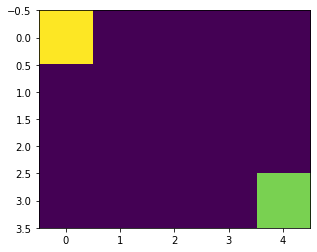

In [5]:
plt.imshow(grid)

In [6]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):

        self.observation_space = spaces.Discrete(20)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 4]
        self.state = np.zeros((4,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

    # Reset function
    def reset(self, **kwargs):

        self.state = np.zeros((4,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()

        info = {}

        return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):

        if action == 0: #down
            self.agent_pos[0] += 1
        if action == 1: #up
            self.agent_pos[0] -= 1
        if action == 2: #right
            self.agent_pos[1] += 1
        if action == 3: #left
            self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 2)

        self.state = np.zeros((4,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 1

        self.timestep += 1

        # Condition to check for termination (episode is over)
        terminated = True if self.timestep >= self.max_timesteps else False

        # Condition to check if agent is traversing to a cell beyond the permitted cells
        # This helps the agent to learn how to behave in a safe and predictable manner
        truncated = True if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 2)) else False

        info = {}

        return observation, reward, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
        plt.title('Grid Environment')
        plt.imshow(self.state)

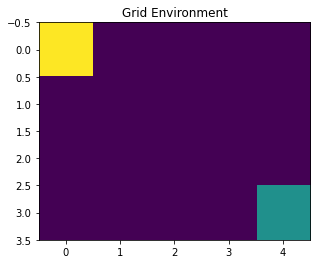

In [7]:
env = GridEnvironment() # This uses __init__() constructor to create object of class.

terminated, truncated = False, False
obs, info = env.reset() # Using reset() function.
env.render() # Using render() function.


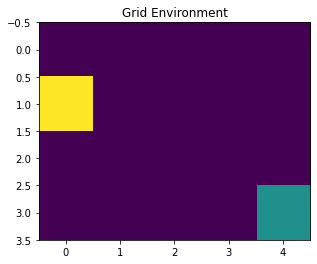

In [8]:
action = 0
observation, reward, done, truncated, info = env.step(action) # Using step() function.
env.render() # Using render() function.

In [9]:
env.close() # Using close() function.

# Step 2: Explore ‘CartPole-v1’ environment [4 points]

In [10]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [11]:
env.reset()

(array([ 0.03697595, -0.03097936,  0.00574137, -0.0028827 ], dtype=float32),
 {})

In [12]:
action = 0
env.step(action)

(array([ 0.03635637, -0.22618318,  0.00568371,  0.29160616], dtype=float32),
 1.0,
 False,
 False,
 {})

In [13]:
action = 1
print('action =', action)
[cart_position, cart_velocity, pole_angle, pole_angular_velocity], reward, _, _, _ = env.step(action)
print('cart_position =', cart_position)
print('cart_velocity =', cart_velocity)
print('pole_angle =', pole_angle)
print('pole_angular_velocity =', pole_angular_velocity)
print('reward =', reward)

action = 1
cart_position = 0.031832702
cart_velocity = -0.03114273
pole_angle = 0.011515838
pole_angular_velocity = 0.00072121096
reward = 1.0


In [14]:
render_output = env.render()

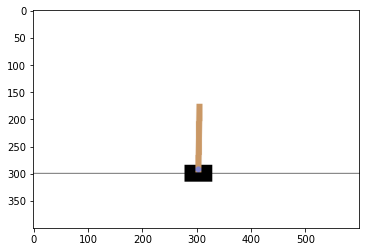

In [15]:
plt.imshow(render_output)

In [16]:
# Definition an agent that takes action randomly
class RandomAgent:

    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, obs):
        """
        Takes a step in the environment by choosing an action randomly.

        Args:
            obs: The current observation.

        Returns:
            The action to take.
        """
        action = np.random.choice(self.action_space.n)
        return action


 ------------ Step 100 of 1000  ------------
cart_position = -0.0014681914
cart_velocity = 0.2310278
pole_angle = -0.012553148
pole_angular_velocity = -0.33075172
reward = 1.0


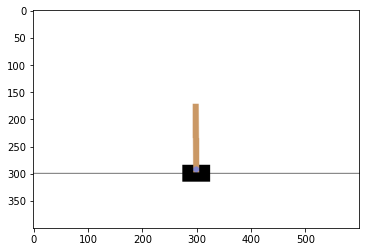


 ------------ Step 200 of 1000  ------------
cart_position = 0.031292055
cart_velocity = 0.20240054
pole_angle = 0.011549041
pole_angular_velocity = -0.25005087
reward = 1.0


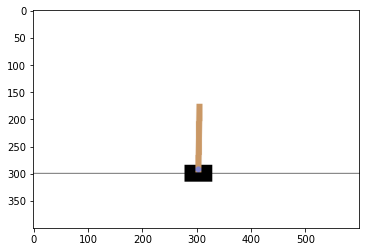


 ------------ Step 300 of 1000  ------------
cart_position = -0.037238833
cart_velocity = 0.23710221
pole_angle = 0.0011498567
pole_angular_velocity = -0.3403351
reward = 1.0


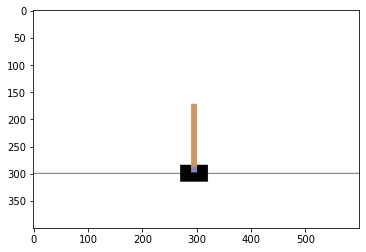


 ------------ Step 400 of 1000  ------------
cart_position = 0.010384543
cart_velocity = -0.1874772
pole_angle = -0.00074344646
pole_angular_velocity = 0.31953615
reward = 1.0


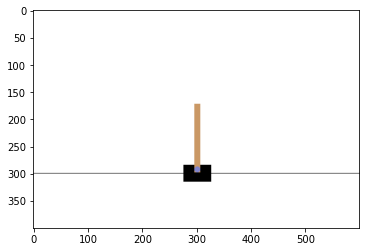


 ------------ Step 500 of 1000  ------------
cart_position = 0.03391533
cart_velocity = -0.16270544
pole_angle = -0.015599907
pole_angular_velocity = 0.24510553
reward = 1.0


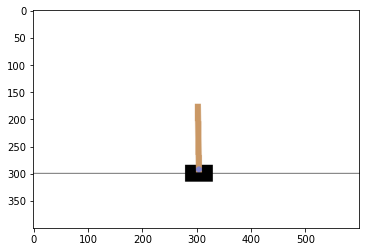


 ------------ Step 600 of 1000  ------------
cart_position = 0.0075250166
cart_velocity = 0.1669362
pole_angle = -0.04726814
pole_angular_velocity = -0.30165163
reward = 1.0


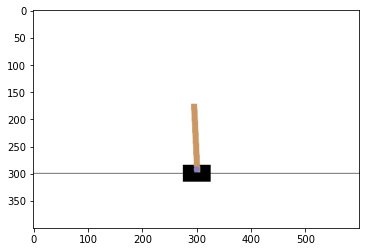


 ------------ Step 700 of 1000  ------------
cart_position = -0.017672723
cart_velocity = 0.23639807
pole_angle = 0.02384214
pole_angular_velocity = -0.31788066
reward = 1.0


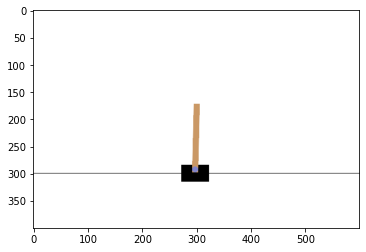


 ------------ Step 800 of 1000  ------------
cart_position = -0.012000936
cart_velocity = -0.16585726
pole_angle = 0.00088136276
pole_angular_velocity = 0.28397164
reward = 1.0


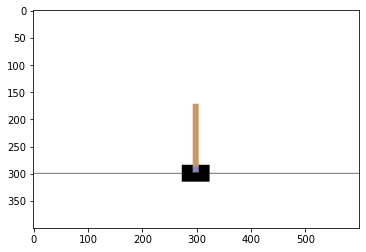


 ------------ Step 900 of 1000  ------------
cart_position = -0.04296616
cart_velocity = -0.23147693
pole_angle = 0.030967658
pole_angular_velocity = 0.30196345
reward = 1.0


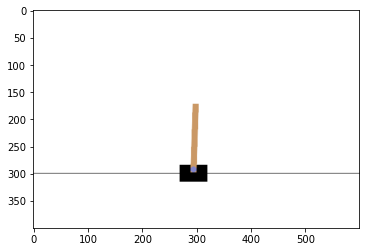


 ------------ Step 1000 of 1000  ------------
cart_position = 0.03506673
cart_velocity = -0.18484378
pole_angle = -0.04392506
pole_angular_velocity = 0.29949254
reward = 1.0


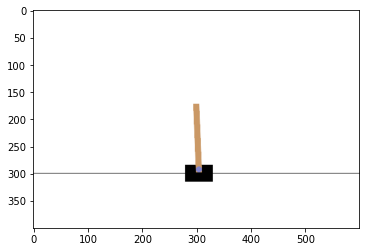

In [17]:
agent = RandomAgent(env)
rewards_1D = []
cumulative_reward = 0
cumulative_rewards_1D = []
max_iterations = 1000

for i in range(max_iterations):
    [cart_position, cart_velocity, pole_angle, pole_angular_velocity], _ = env.reset()
    action = agent.step(obs)
    [cart_position, cart_velocity, pole_angle, pole_angular_velocity], reward, _, _, _ = env.step(action)
    rewards_1D.append(reward)
    cumulative_reward = cumulative_reward + reward
    cumulative_rewards_1D.append(cumulative_reward)
    # print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    if (i + 1) % 100 == 0:
        print('\n ------------ Step', i + 1, 'of', max_iterations, ' ------------')
        print('cart_position =', cart_position)
        print('cart_velocity =', cart_velocity)
        print('pole_angle =', pole_angle)
        print('pole_angular_velocity =', pole_angular_velocity)
        print('reward =', reward)
        render_output = env.render()
        plt.imshow(render_output)
        plt.show()

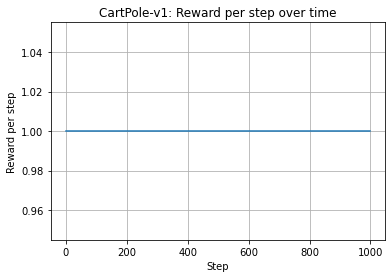

In [18]:
plt.plot(rewards_1D)
plt.grid()
plt.xlabel('Step')
plt.ylabel('Reward per step')
plt.title('CartPole-v1: Reward per step over time')
plt.savefig('CartPole-v1 reward per step over time', bbox_inches = 'tight')

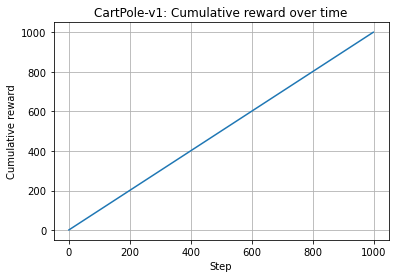

In [19]:
plt.plot(cumulative_rewards_1D)
plt.grid()
plt.xlabel('Step')
plt.ylabel('Cumulative reward')
plt.title('CartPole-v1: Cumulative reward over time')
plt.savefig('CartPole-v1 cumulative reward over time', bbox_inches = 'tight')

In [20]:
env.close()

# Step 3: Explore any other environment [4 points]

## Lunar lander example:

In [21]:
# Initialise the environment
env = gym.make("LunarLander-v3", render_mode="human")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):
    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()

## Mountain Car environment:

In [22]:
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)  # default goal_velocity=0

env.reset(seed=123, options={"x_init": np.pi/2, "y_init": 0.5})  # default x_init=np.pi, y_init=1.0


(array([-0.46352962,  0.        ], dtype=float32), {})

In [23]:
action = 0
env.step(action)

(array([-0.4649777 , -0.00144808], dtype=float32), -1.0, False, False, {})

In [24]:
action = 1
print('action =', action)
[x, y], reward, _, _, _ = env.step(action)
print('x =', cart_position)
print('y =', cart_velocity)
print('reward =', reward)

action = 1
x = 0.03506673
y = -0.18484378
reward = -1.0


In [25]:
action = 2
print('action =', action)
[x, y], reward, _, _, _ = env.step(action)
print('x =', x)
print('y =', y)
print('reward =', reward)

action = 2
x = 0.03506673
y = -0.18484378
reward = -1.0



 ------------ Step 100 of 1000  ------------
x = -0.48841542
y = -0.00026536448
reward = -1.0


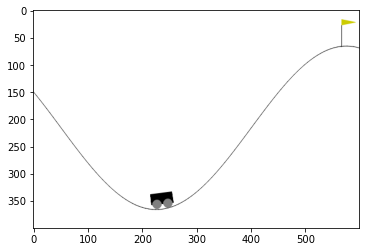


 ------------ Step 200 of 1000  ------------
x = -0.44411272
y = 0.00041249482
reward = -1.0


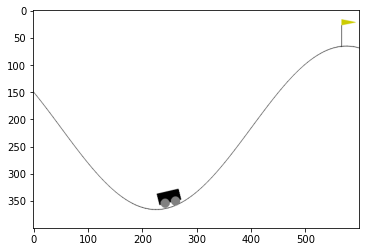


 ------------ Step 300 of 1000  ------------
x = -0.54458684
y = 0.00015849265
reward = -1.0


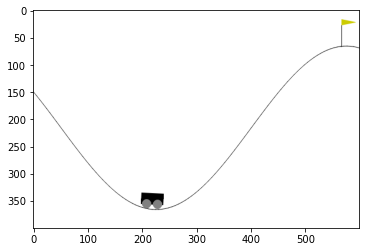


 ------------ Step 400 of 1000  ------------
x = -0.52730614
y = 2.8014769e-05
reward = -1.0


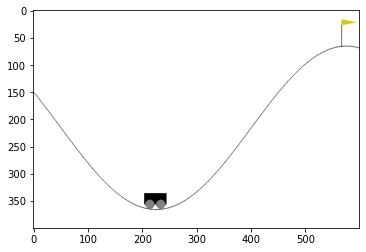


 ------------ Step 500 of 1000  ------------
x = -0.42471454
y = -0.0007360796
reward = -1.0


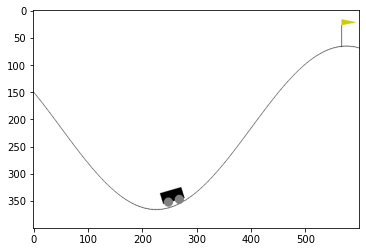


 ------------ Step 600 of 1000  ------------
x = -0.5955148
y = -0.0004682355
reward = -1.0


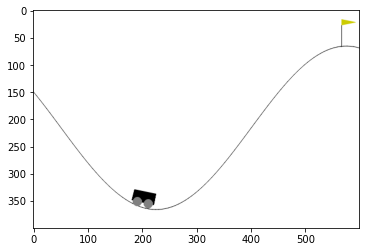


 ------------ Step 700 of 1000  ------------
x = -0.4940442
y = 0.00078449235
reward = -1.0


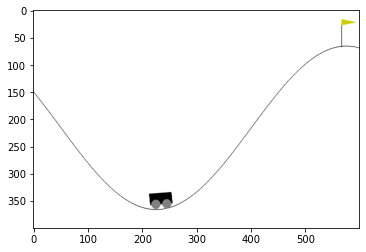


 ------------ Step 800 of 1000  ------------
x = -0.55380553
y = -0.00077958294
reward = -1.0


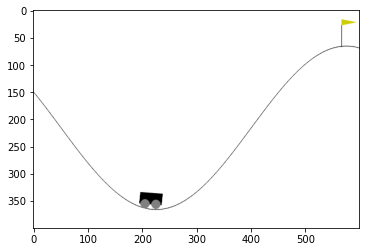


 ------------ Step 900 of 1000  ------------
x = -0.4719553
y = -0.0013961204
reward = -1.0


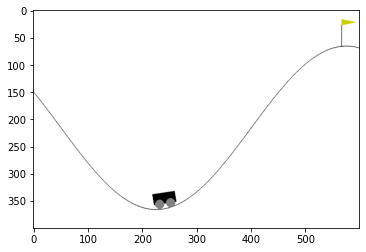


 ------------ Step 1000 of 1000  ------------
x = -0.5078156
y = -0.00011922294
reward = -1.0


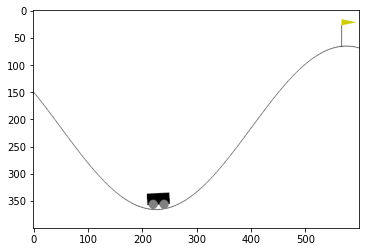

In [26]:
agent = RandomAgent(env)
rewards_1D = []
cumulative_reward = 0
cumulative_rewards_1D = []
max_iterations = 1000

for i in range(max_iterations):
    [x, y], _ = env.reset()
    action = agent.step(obs)
    [x, y], reward, _, _, _ = env.step(action)
    rewards_1D.append(reward)
    cumulative_reward = cumulative_reward + reward
    cumulative_rewards_1D.append(cumulative_reward)
    if (i + 1) % 100 == 0:
        print('\n ------------ Step', i + 1, 'of', max_iterations, ' ------------')
        print('x =', x)
        print('y =', y)
        print('reward =', reward)
        render_output = env.render()
        plt.imshow(render_output)
        plt.show()

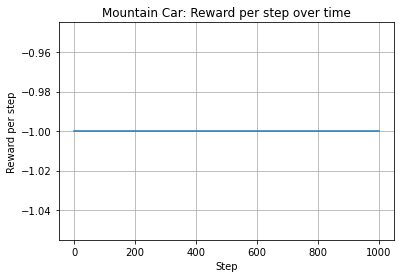

In [27]:
plt.plot(rewards_1D)
plt.grid()
plt.xlabel('Step')
plt.ylabel('Reward per step')
plt.title('Mountain Car: Reward per step over time')
plt.savefig('Mountain Car reward per step over time', bbox_inches = 'tight')

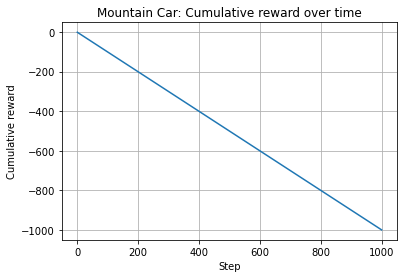

In [28]:
plt.plot(cumulative_rewards_1D)
plt.grid()
plt.xlabel('Step')
plt.ylabel('Cumulative reward')
plt.title('Mountain Car: Cumulative reward over time')
plt.savefig('Mountain Car cumulative reward over time', bbox_inches = 'tight')